In [1]:
import matplotlib.pyplot as plt
import numpy as np

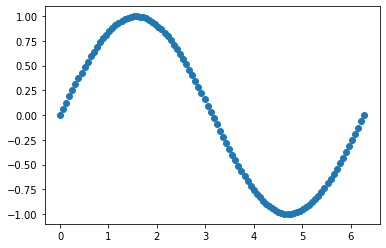

In [4]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.scatter(x, y)

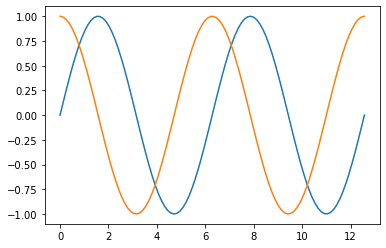

In [7]:
x = np.linspace(0, 4 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

x = x.reshape(-1, 1)
y1 = y1.reshape(-1, 1)
y2 = y2.reshape(-1, 1)

y_stacked = np.hstack([y1, y2])

plt.plot(x, y_stacked);

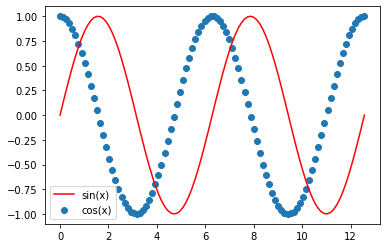

In [15]:
x = np.linspace(0, 4 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, 'r', label='sin(x)')
plt.scatter(x, y2, label='cos(x)');

plt.legend();  # Чтобы лейблы проявились

# Стили

In [21]:
import matplotlib
matplotlib.rc('font', **dict(size=14))  # Увеличим размер шрифта

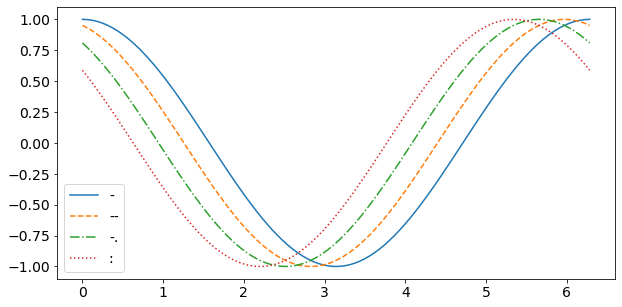

In [28]:
styles = ['-', '--', '-.', ':']

plt.figure(figsize=(10, 5))
x = np.linspace(0, 2 * np.pi, 100)

for i, style in enumerate(styles):
    y = np.cos(x + 0.1 * np.pi * i)
    plt.plot(x, y, style, label=style)
    
plt.legend()

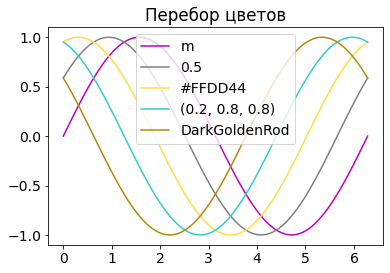

In [48]:
# Во-первых, цвета одной буквой из rgb и cmyk
# Во-вторых, это оттенки серого от '0.0' до '1.0' (от черного до белого)
# В-третьих, в HEX формате, например #FFDD44
# В-четвёртых, это кортеж из трёх float чисел, например (0.2, 0.8, 0.8)
# В-пятых - HTML цвета, например 'DarkGoldenRod'

colors = ['m', '0.5', '#FFDD44', (0.2, 0.8, 0.8), 'DarkGoldenRod']
x = np.linspace(0, 2 * np.pi, 100)

for i, color in enumerate(colors):
    y = np.sin(x + 0.2 * np.pi * i)
    plt.plot(x, y, color=color, label=color)

plt.title('Перебор цветов')
plt.legend();

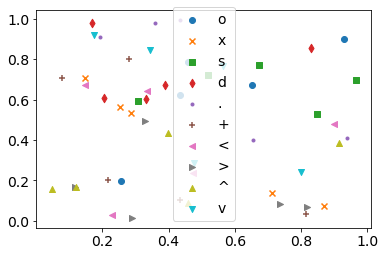

In [63]:


markers = 'oxsd.+<>^v'
for marker in markers:
    plt.scatter(np.random.rand(5), np.random.rand(5), marker=marker, label=marker)

plt.legend();

# Subplots (несколько осей на одном графике)

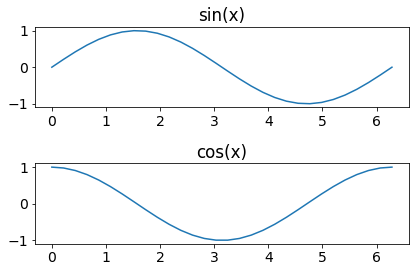

In [73]:
f, axes = plt.subplots(2)

x = np.linspace(0, 2 * np.pi, 30)
y1 = np.sin(x)
y2 = np.cos(x)

plt.sca(axes[0])  # sca - set current axes
plt.plot(x, y1)
plt.title('sin(x)')

plt.sca(axes[1])
plt.plot(x, y2)
plt.title('cos(x)')

plt.tight_layout();  # Исключает наслаивание элементов. Закомментируйте и посмотрите разницу

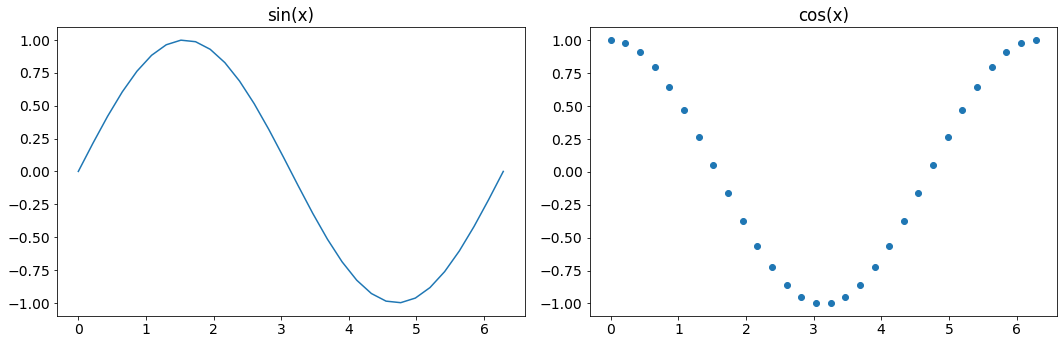

In [83]:
# Второй способ

f, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1, 2 - одна строка, два столбца

x = np.linspace(0, 2 * np.pi, 30)
y1 = np.sin(x)
y2 = np.cos(x)

axes[0].plot(x, y1)
axes[1].scatter(x, y2);

# Чтобы подписать что либо, нужно добавлять set
axes[0].set_title('sin(x)')
axes[1].set_title('cos(x)')

plt.tight_layout()

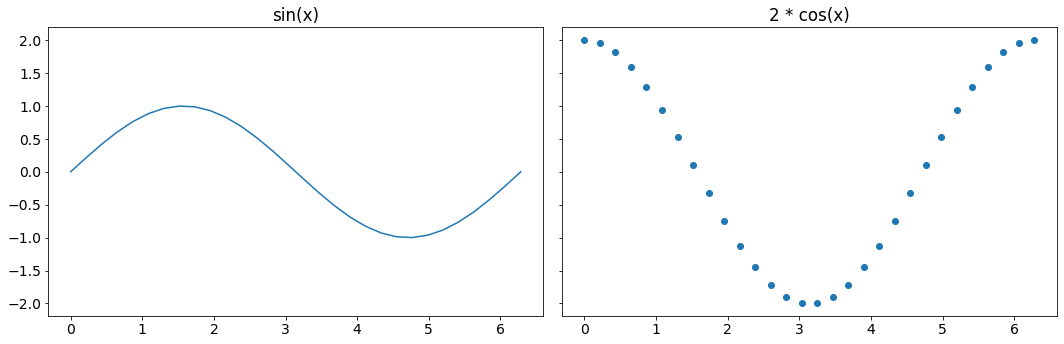

In [88]:
# Шаринг осей

f, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)  # 1, 2 - одна строка, два столбца

x = np.linspace(0, 2 * np.pi, 30)
y1 = np.sin(x)
y2 = 2 * np.cos(x)

axes[0].plot(x, y1)
axes[1].scatter(x, y2);

# Чтобы подписать что либо, нужно добавлять set
axes[0].set_title('sin(x)')
axes[1].set_title('2 * cos(x)')

plt.tight_layout()

# Pandas

In [90]:
import pandas as pd
import numpy as np

In [95]:
height_array = np.random.normal(178, 5, 5).astype(int)
height = pd.Series(height_array)

print(height)

0    190
1    170
2    167
3    177
4    186
dtype: int64


In [99]:
persons = 'Иванов Петров Сидоров Алексндров Сергеев'.split()
height = pd.Series(height_array, index=persons)

print(height)

Иванов        190
Петров        170
Сидоров       167
Алексндров    177
Сергеев       186
dtype: int64


In [106]:
height.sort_values()

Сидоров       167
Петров        170
Алексндров    177
Сергеев       186
Иванов        190
dtype: int64

In [110]:
height.index

Index(['Иванов', 'Петров', 'Сидоров', 'Алексндров', 'Сергеев'], dtype='object')

In [120]:
matrix = np.random.randint(5, 30, (5, 3))

df = pd.DataFrame(matrix, 
                  index='Хлеб Колбаса Огурцы Помидоры Яблоки'.split(),
                  columns='Белки Жиры Углеводы'.split()
                 )

,Белки,Жиры,Углеводы
Хлеб,20,26,6
Колбаса,20,26,18
Огурцы,9,22,26
Помидоры,26,27,12
Яблоки,9,9,26


In [138]:
matrix = np.random.randint(5, 30, (5, 3))

df = pd.DataFrame(matrix)
df.index = 'Хлеб Колбаса Огурцы Помидоры Яблоки'.split()
df.columns = 'Белки Жиры Углеводы'.split()

# По сути DataFrame - это набор из series, в данном случае это Жиры Белки Углеводы
df.iloc[0]  # Если хотим обратиться по строке - используем df.loc[индекс] или df.iloc[int]

Белки       15
Жиры        26
Углеводы    12
Name: Хлеб, dtype: int64

In [144]:
df["Калорийность"] = np.random.randint(100, 500, 5)  # Через присвоение можно создать новые колонки
df

,Белки,Жиры,Углеводы,Калорийность
Хлеб,15,26,12,495
Колбаса,16,6,24,417
Огурцы,21,8,8,189
Помидоры,25,17,16,166
Яблоки,28,29,28,125


In [146]:
matrix = np.random.randint(5, 30, (5, 3))

df = pd.DataFrame(matrix)
df.index = 'Хлеб Колбаса Огурцы Помидоры Яблоки'.split()
df.columns = 'Белки Жиры Углеводы'.split()

# Новые колонки можно создавать как функции от существующих
df['Калорийность'] = df['Белки'] * 4.1 + df['Жиры'] * 9.3 + df['Углеводы'] * 4.1
df

,Белки,Жиры,Углеводы,Калорийность
Хлеб,24,10,29,310.3
Колбаса,17,13,11,235.7
Огурцы,7,19,16,271.0
Помидоры,17,6,9,162.4
Яблоки,21,9,23,264.1


In [166]:
h = np.random.normal(178, 5, 5).astype(int)
h_index = 'Иванов Петров Сидоров Сергеев Александров'.split()

w = np.random.normal(70, 5, 5).astype(int)
w_index = 'Иванов Петров Сидоров Сергеев Степанов'.split()

height = pd.Series(h, index=h_index)
weight = pd.Series(w, index=w_index)

df = pd.DataFrame({"Рост": height, "Вес": weight})
df["ИМТ"] = df['Вес'] / (df['Рост'] / 100) ** 2
df.index.set_names('Фамилия', inplace=True)
df

,Рост,Вес,ИМТ
Фамилия,,,
Александров,176.0,NaN,NaN
Иванов,182.0,65.0,19.623234
Петров,178.0,61.0,19.252620
Сергеев,171.0,69.0,23.597004
Сидоров,192.0,64.0,17.361111
Степанов,NaN,67.0,NaN


In [173]:
# csv - comma separated values

with open('food.csv') as f:
    lines = f.readlines()
    
for line in lines:
    print(line)

,Белки,Жиры,Углеводы

Хлеб,10,7,5

Колбаса,28,14,5

Огурцы,15,22,16

Помидоры,5,13,8

Яблоки,15,26,9



In [171]:
matrix = np.random.randint(5, 30, (5, 3))

df = pd.DataFrame(matrix, 
                  index='Хлеб Колбаса Огурцы Помидоры Яблоки'.split(),
                  columns='Белки Жиры Углеводы'.split()
                 )

df.to_csv('food.csv')

In [174]:
new_df = pd.read_csv('food.csv', index_col=0)  # Указываем первую колонку в качестве индекса
new_df

,Белки,Жиры,Углеводы
Хлеб,10,7,5
Колбаса,28,14,5
Огурцы,15,22,16
Помидоры,5,13,8
Яблоки,15,26,9
